<a href="https://colab.research.google.com/github/Arpandi2003/Arpandi2003/blob/main/kidney_disease_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pandiar","key":"34b0c21d16bfb25cb68e14860672f809"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder 
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act 
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

401 - Unauthorized


In [ ]:
!kaggle datasets download -d colearninglounge/chronic-kidney-disease

401 - Unauthorized


In [ ]:
!unzip chronic-kidney-disease.zip

Archive:  chronic-kidney-disease.zip
  inflating: kidney_disease_test.csv  
  inflating: kidney_disease_train.csv  


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [2]:
p=pd.read_csv('./kidney_disease_train.csv')

In [3]:
p.head(3)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd


In [4]:
p.describe

<bound method NDFrame.describe of       id   age     bp     sg   al   su     rbc        pc         pcc  \
0    157  62.0   70.0  1.025  3.0  0.0  normal  abnormal  notpresent   
1    109  54.0   70.0    NaN  NaN  NaN     NaN       NaN  notpresent   
2     17  47.0   80.0    NaN  NaN  NaN     NaN       NaN  notpresent   
3    347  43.0   60.0  1.025  0.0  0.0  normal    normal  notpresent   
4     24  42.0  100.0  1.015  4.0  0.0  normal  abnormal  notpresent   
..   ...   ...    ...    ...  ...  ...     ...       ...         ...   
275   71  46.0   60.0  1.010  1.0  0.0  normal    normal  notpresent   
276  106  50.0   90.0    NaN  NaN  NaN     NaN       NaN  notpresent   
277  270  23.0   80.0  1.025  0.0  0.0  normal    normal  notpresent   
278  348  38.0   80.0  1.020  0.0  0.0  normal    normal  notpresent   
279  102  17.0   60.0  1.010  0.0  0.0     NaN    normal  notpresent   

             ba  ...   pcv     wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  39.0 

In [5]:
p.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id    age     bp     sg     al     su    rbc     pc    pcc     ba  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False   True   True   True   True   True  False  False   
2    False  False  False   True   True   True   True   True  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275  False  False  False  False  False  False  False  False  False  False   
276  False  False  False   True   True   True   True   True  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False   True  False  False  False   

     ...    p

In [6]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [7]:
p.shape

(280, 26)

<BarContainer object of 26 artists>

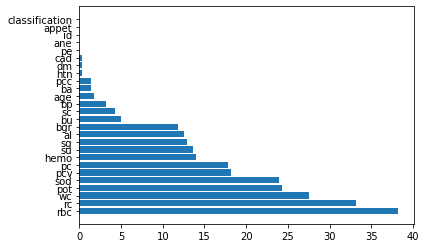

In [8]:
missing_values = (p.isnull().sum()/len(p)) * 100                 
missing_values.sort_values(ascending=False,inplace=True)
plt.barh(y=missing_values.index,width= missing_values.values)

In [9]:
p['classification'].replace({'ckd':1,'notckd':0},inplace=True) 
p.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,1
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,1


In [12]:
p.select_dtypes('object').nunique()

rbc       2
pc        2
pcc       2
ba        2
wc       78
rc       48
htn       2
dm        4
cad       3
appet     2
pe        2
ane       2
dtype: int64

In [13]:
p.drop(columns=['wc','rc','dm','cad','id'],inplace=True)

In [14]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [15]:
dummies = list(p.select_dtypes('object').columns) # create dummies and drop drop_first !
dummies

['rbc', 'pc', 'pcc', 'ba', 'htn', 'appet', 'pe', 'ane']

In [16]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [17]:
p = pd.get_dummies(p,columns=dummies)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
1,54.0,70.0,NaN,NaN,NaN,233.0,50.1,1.9,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,47.0,80.0,NaN,NaN,NaN,114.0,87.0,5.2,139.0,3.7,...,1,0,0,1,0,1,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
4,42.0,100.0,1.015,4.0,0.0,NaN,50.0,1.4,129.0,4.0,...,0,1,0,1,0,1,1,0,1,0


In [18]:
correlation = abs(p.corr().sort_values(by='classification')['classification'])
correlation

sg                0.757986
hemo              0.756028
pcv               0.727636
rbc_normal        0.684856
htn_no            0.580132
pc_normal         0.500231
appet_good        0.416242
pe_no             0.368337
sod               0.354435
ane_no            0.318642
pcc_notpresent    0.175150
ba_notpresent     0.102111
pot               0.101139
ba_present        0.192148
pcc_present       0.249717
age               0.256630
rbc_abnormal      0.265302
bp                0.276949
sc                0.285913
ane_yes           0.318642
su                0.352065
pc_abnormal       0.359476
bu                0.365920
pe_yes            0.368337
appet_poor        0.416242
bgr               0.446966
htn_yes           0.590838
al                0.635497
classification    1.000000
Name: classification, dtype: float64

In [19]:
select = list(correlation[correlation > 0.3].index)
select

['sg',
 'hemo',
 'pcv',
 'rbc_normal',
 'htn_no',
 'pc_normal',
 'appet_good',
 'pe_no',
 'sod',
 'ane_no',
 'ane_yes',
 'su',
 'pc_abnormal',
 'bu',
 'pe_yes',
 'appet_poor',
 'bgr',
 'htn_yes',
 'al',
 'classification']

In [20]:
p[select].isnull().sum()

sg                36
hemo              39
pcv               51
rbc_normal         0
htn_no             0
pc_normal          0
appet_good         0
pe_no              0
sod               67
ane_no             0
ane_yes            0
su                38
pc_abnormal        0
bu                14
pe_yes             0
appet_poor         0
bgr               33
htn_yes            0
al                35
classification     0
dtype: int64

In [21]:
#p.fillna(0,inplace=True) 
#p.head()
p.dropna(how='any',inplace=True)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
6,29.0,80.0,1.020,0.0,0.0,83.0,49.0,0.9,139.0,3.3,...,1,0,1,0,1,0,1,0,1,0
10,56.0,60.0,1.025,0.0,0.0,132.0,18.0,1.1,147.0,4.7,...,1,0,1,0,1,0,1,0,1,0
12,42.0,80.0,1.020,0.0,0.0,98.0,20.0,0.5,140.0,3.5,...,1,0,1,0,1,0,1,0,1,0


In [22]:
p.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
classification    0
rbc_abnormal      0
rbc_normal        0
pc_abnormal       0
pc_normal         0
pcc_notpresent    0
pcc_present       0
ba_notpresent     0
ba_present        0
htn_no            0
htn_yes           0
appet_good        0
appet_poor        0
pe_no             0
pe_yes            0
ane_no            0
ane_yes           0
dtype: int64

In [23]:
X = p.drop(columns='classification')    # Split label and datsets
y = p['classification']

In [24]:
X.to_csv('kidney.csv')
X.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age     bp     sg     al     su    bgr     bu     sc    sod    pot  \
0    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
12   False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
273  False  False  False  False  False  False  False  False  False  False   
275  False  False  False  False  False  False  False  False  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False  False  False  False  False   

     ...  ba_

In [25]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [77]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
model2=DecisionTreeRegressor() 
model3=DecisionTreeClassifier()
model2.fit(X_train,y_train) 

DecisionTreeRegressor()

In [78]:
X_train

array([[0.5       , 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.57692308, 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.12820513, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14102564, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ]])


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
LogisticRegression()
> 
THEY GIVEN THE WORKING MESSAGE FOR US BECAUSE OUR DATASET SHOULD BE IN THE FORM OF O'S AND 1'S .SO WE HAVE SCALE THEM




In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

NOW THE SCALEING PART OVER SO WE HAVE FIT AND RUN OUR ALGORITHM


In [81]:
y_train

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],

In [82]:
#y_test.describe
# y_test=scaler.fit_transform(y_test.values.reshape(-1,1)) 
y_test=scaler.fit_transform(y_test.reshape(-1,1))

In [83]:
#y_test.describe
y_train=scaler.fit_transform(y_train.reshape(-1,1))

In [84]:
X_train.shape

(108, 28)

In [85]:
#model.predict(X_test)
X_train

array([[0.5       , 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.57692308, 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.12820513, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14102564, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ]])

#Predict using Logistic Regression

In [86]:
model.predict(X_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0.])

In [87]:
model.score(X_test,y_test)

0.9444444444444444

#Prediction using SVM

In [88]:
model1.predict(X_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [89]:
model1.score(X_test,y_test)

0.8888888888888888

#Decision_Tree

In [90]:
model2.predict(X_test) 
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
model2.score(X_test,y_test ) #decision tree Regressor

0.6625000000000001

In [92]:
model3.score(X_test,y_test)#decison tree classifier

0.9166666666666666